# Лабораторная работа 
**Максимовой Елизаветы,** 
**18ИАД**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Чтение, описание и обработка данных

In [2]:
data = pd.read_csv('leaf.csv', sep = ',', engine = 'python', header=None)

In [3]:
data.columns = [u'Class', u'Specimen Number', u'Eccentricity', u'Aspect Ratio', u'Elongation',
       u'Solidity', u'Stochastic Convexity', u'Isoperimetric Factor', u'Maximal Indentation Depth', u'Lobedness',
       u'Average Intensity', u'Average Contrast', u'Smoothness', u'Third moment', u'Uniformity', u'Entropy']

In [4]:
import copy
all_data = copy.deepcopy(data)

Задача - классификация 40 различных видов растений по набору фигурных и текстурных признаков, извлеченных из цифровых изображений листовых образцов растений. На вход программе будет подаваться набор листиков с различными признаками (описанными ниже), на выходе ожидается определение растения (номер класса), к которому принадлежит данные лист.
Пример используемых изображений:

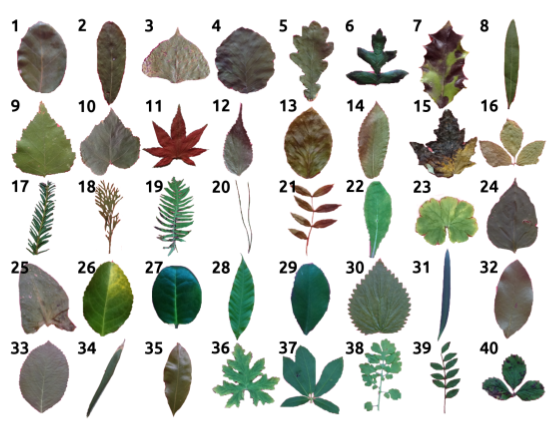

In [5]:
from IPython.display import Image
Image("Leaf.png")

Описание признаков объекта в исходном наборе данных:

**1. Класс растения** - всего в данных присутствую 36 разных видов растений (несмотря на картинку с примером)
    
**2. Номер образца**


Признаки по форме листа:

**3. Эксцентриситет**
    
**4. Соотношения сторон листа** - значения, близкие к 0 указывают на продолговатую форму
    
**5. Удлинение** - данная характеристика получается как разность между 1 и значением отношения между диаметром наибольшей вписанной окружности и диаметра наименьшего описанного круга
    
**6. Мера выпуклости** - измеряет, насколько хорошо лист прилегает к выпуклой форме
    
**7. Стохастическая выпуклость** - эта переменная расширяет обычное понятие выпуклости в топологическом смысле, используя выборку для выполнения расчета, целью является оценка вероятности, что все точки случайного отрезка [XY] (X, Y - принадлежать краям листа) лежат внутри листа
    
**8. Изопериметрический фактор** - максимальное значение этого параметра - 1 достигается при круговой области листа, плавные переплетенные контуры дают низкие значения
    
**9. Максимальная глубина отступа**

**10. Дольчатость** - эта особенность характеризует лепестки листа


Признаки по текстуре листа (параметры получены по статистическим свойствам гистограмм интенсивности преобразованных исходных изображений RGB в изображение из отенков серого):
   
**11. Средняя интенсивность** - средняя интенсивность изображения
    
**12. Средняя контрастность** - стандартное отклонение интенсивности изображения
    
**13. Гладкость** - нормализированная величина, измеряет относительную гладкость интенсивностей, принимает значение близкое к 0, если практически нет различий в значении интенсивности областей, и приближается к 1 в противном случае
    
**14. Третий момент** - нормализированная мера искажения гистограммы интенсивности
    
**15. Однородность** - принимает максимальное значение, если все уровни интенсивности областей равны
    
**16. Энтропия** - мера интенсивности случайности

Этот набор данных был создан исследователями Pedro F. B. Silva и Andre R. S. Marcal с использованием фотографий листовых образцов, собранных Rubim Almeida da Silva на факультете естественных наук Университета Порту, Португалия.
Более подробно про набор данных можно прочитать [здесь](https://archive.ics.uci.edu/ml/datasets/leaf)

In [6]:
data.shape

(340, 16)

Пример входных данных:

In [7]:
data.head()

,Class,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [8]:
data.tail()

,Class,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.5358,0.114880,0.20861,0.041703,0.013344,0.000820,2.0281
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.1358,0.141220,0.21830,0.045488,0.012002,0.001515,2.4059
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.4664,0.097663,0.20703,0.041101,0.016123,0.000453,1.6935
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.3394,0.050389,0.13585,0.018121,0.006190,0.000265,1.1526
339,36,10,0.47195,1.0901,0.85409,0.53598,0.39649,0.078376,0.132270,3.1840,0.082007,0.18782,0.034074,0.013487,0.000329,1.5623


**Визуализируем несколько полезных для анализа графиков, проверяем данные на наличие коррелированных признаков**

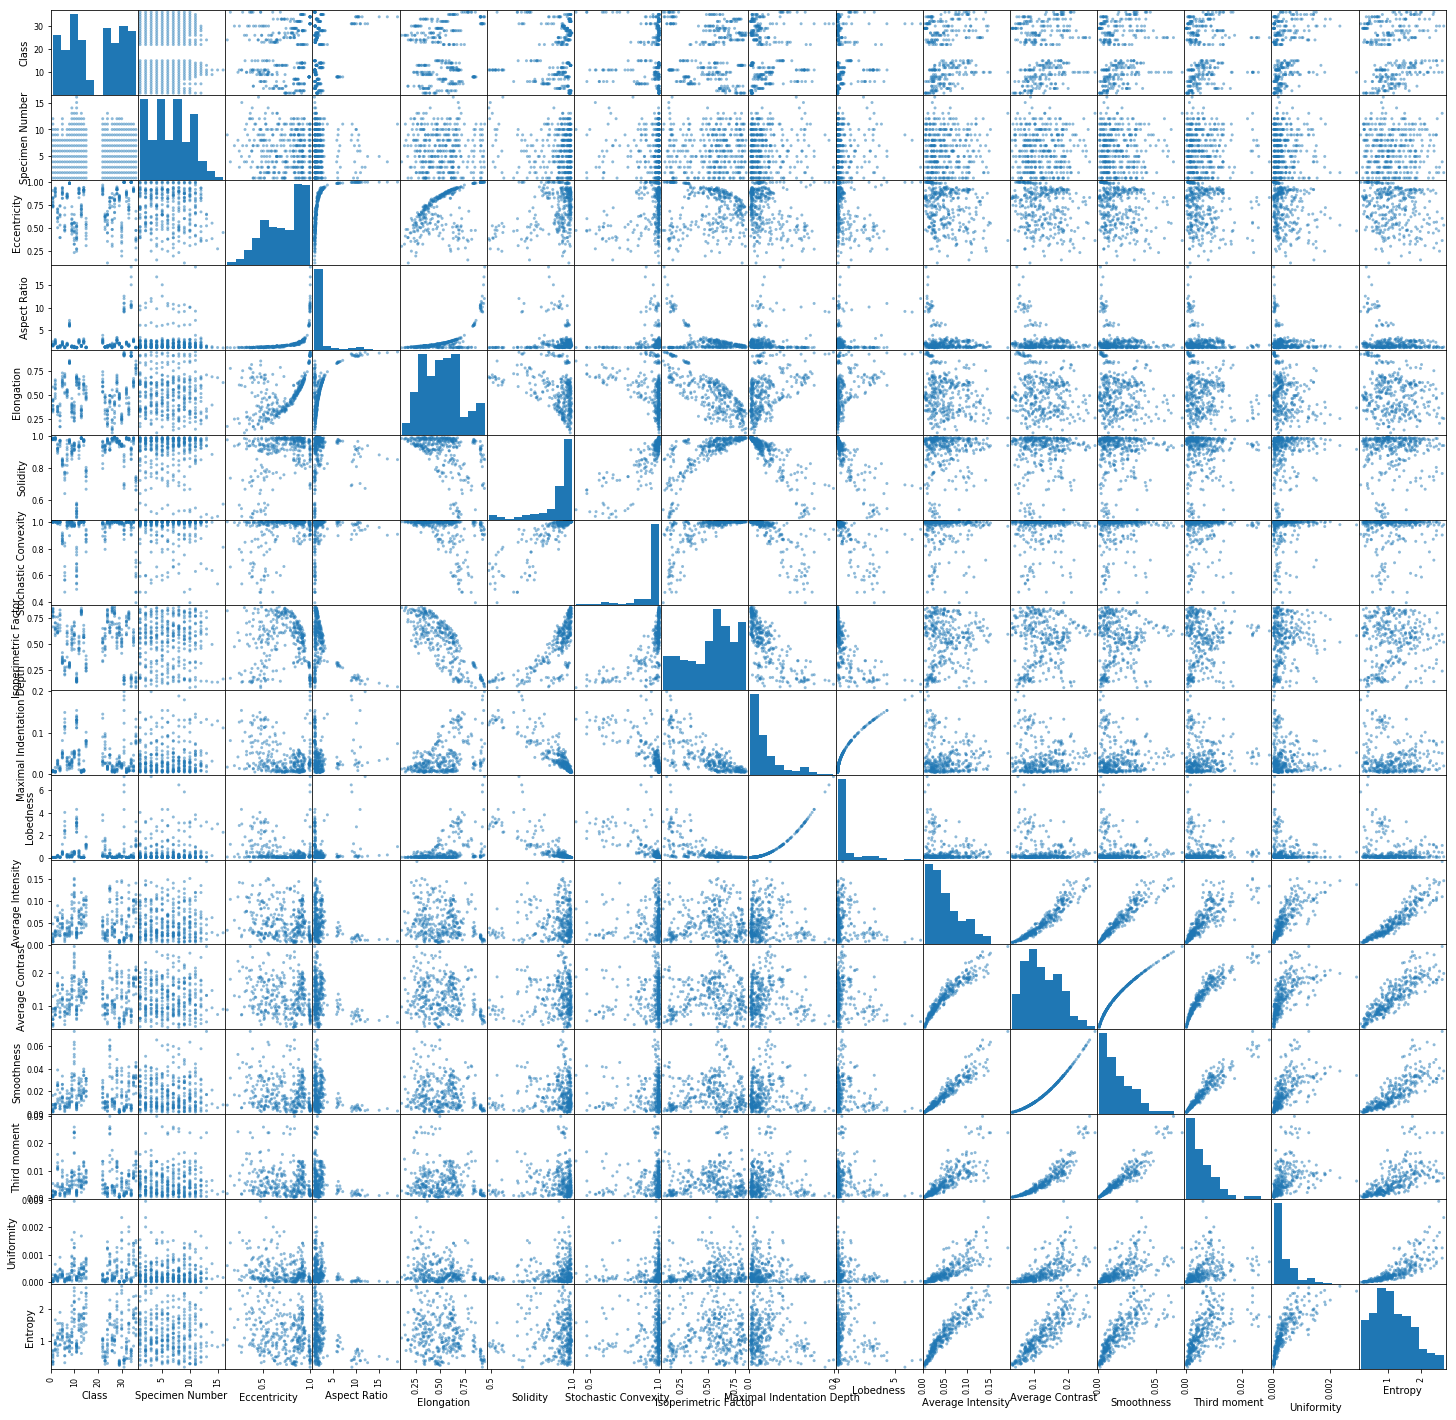

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .5, figsize = (25, 25))
pass

Посмотрим на некоторые графики зависимости двух признаков

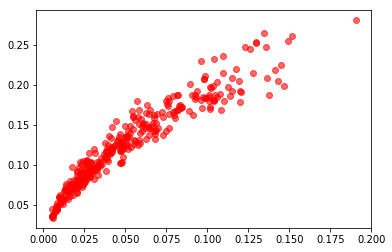

In [10]:
plt.plot(data['Average Intensity'], data['Average Contrast'], 'o', alpha = 0.6, color="red");

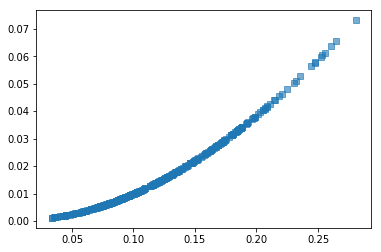

In [11]:
plt.plot(data['Average Contrast'], data['Smoothness'], 's', alpha = 0.6);

Посмотрим на матрицу корреляций:

In [12]:
corr = data.corr()
corr

,Class,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
Class,1.000000,-0.015142,0.091415,0.275210,0.141275,0.111843,0.046678,-0.049767,-0.040026,-0.017048,0.102453,0.076246,0.094885,0.058520,0.187717,0.017690
Specimen Number,-0.015142,1.000000,-0.076772,-0.025490,-0.027722,-0.071623,-0.025219,0.004129,0.065016,0.062324,-0.009725,-0.012664,0.004628,0.010632,-0.040407,-0.033548
Eccentricity,0.091415,-0.076772,1.000000,0.551069,0.553561,0.373536,0.386332,-0.036086,-0.274361,-0.213635,-0.226307,-0.194736,-0.191061,-0.149555,-0.250345,-0.239689
Aspect Ratio,0.275210,-0.025490,0.551069,1.000000,0.678304,0.005173,0.107148,-0.471024,0.091851,0.122447,-0.282176,-0.297516,-0.263273,-0.233767,-0.229363,-0.312881
Elongation,0.141275,-0.027722,0.553561,0.678304,1.000000,-0.411437,-0.378827,-0.793095,0.437071,0.407873,-0.204517,-0.188545,-0.178534,-0.151095,-0.250682,-0.210903
Solidity,0.111843,-0.071623,0.373536,0.005173,-0.411437,1.000000,0.862526,0.755480,-0.885721,-0.823757,0.084869,0.082696,0.077565,0.058905,0.126263,0.055589
Stochastic Convexity,0.046678,-0.025219,0.386332,0.107148,-0.378827,0.862526,1.000000,0.655910,-0.769124,-0.699630,0.063159,0.057957,0.050713,0.036619,0.106687,0.052572
Isoperimetric Factor,-0.049767,0.004129,-0.036086,-0.471024,-0.793095,0.755480,0.655910,1.000000,-0.735776,-0.624161,0.080628,0.078250,0.074597,0.066503,0.133144,0.069783
Maximal Indentation Depth,-0.040026,0.065016,-0.274361,0.091851,0.437071,-0.885721,-0.769124,-0.735776,1.000000,0.946455,-0.090496,-0.088703,-0.058970,-0.023151,-0.137758,-0.111749
Lobedness,-0.017048,0.062324,-0.213635,0.122447,0.407873,-0.823757,-0.699630,-0.624161,0.946455,1.000000,-0.169071,-0.177816,-0.149011,-0.119249,-0.169245,-0.181064


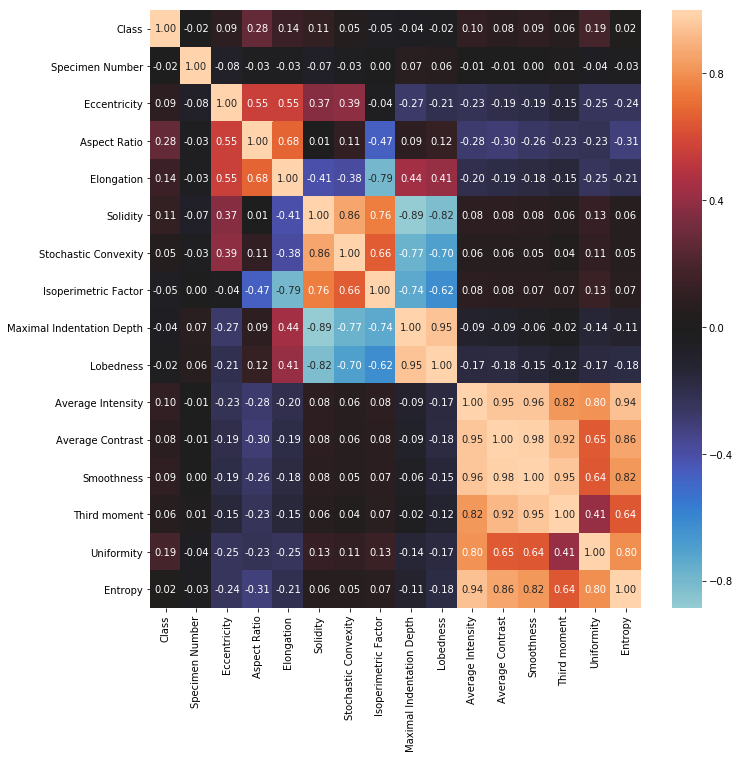

In [13]:
import seaborn as sns
plt.figure(figsize = (11,11))
sns.heatmap(corr, annot=True, fmt=".2f", center=0);

In [14]:
for row in data.columns:
    for col in data.columns:
        if col == row:
            break
        if corr[row][col] >= 0.95:
            print(row + " - " + col)

Average Contrast - Average Intensity
Smoothness - Average Intensity
Smoothness - Average Contrast
Third moment - Smoothness


Анализируя матрицу корреляций, можно сделать вывод, что некоторые наборы признаков: **Средняя контрастность (Average Contrast)**, **Средняя интенсивность (Average Intensity)**, **Гладкость (Smoothness)** и **Гладкость (Smoothness)**, **Третий момент (Third moment)** сильно коррелированны. Поэтому удаляем столбцы **'Average Intensity'** и **'Smoothness'**, чтобы в данных не осталось скоррелированных признаков. Также удаляем атрибут **"Specimen Number" (Номер образца)**, так как он не несет в себе никакой полезной для анализа смысловой нагрузки.

In [15]:
data = data.drop('Average Intensity', axis = 1)\
           .drop('Smoothness', axis = 1)\
           .drop('Specimen Number', axis = 1)

**Первичная обработка данных, работа с пропущенными значениями, векторизация**

In [16]:
data.describe(include = 'all')

,Class,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,18.544118,0.719854,2.440210,0.513760,0.904158,0.943793,0.531234,0.037345,0.523845,0.124535,0.005928,0.000387,1.162630
std,11.152514,0.208311,2.599043,0.195583,0.114639,0.115047,0.217532,0.038575,1.039639,0.051860,0.005294,0.000431,0.584854
min,1.000000,0.117080,1.006600,0.107610,0.485490,0.396490,0.078376,0.002837,0.001464,0.033415,0.000229,0.000007,0.169400
25%,9.000000,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.083362,0.002080,0.000102,0.718900
50%,15.000000,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.119375,0.004447,0.000239,1.077450
75%,29.000000,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.163795,0.008307,0.000516,1.554575
max,36.000000,0.998710,19.038000,0.948340,0.993880,1.000000,0.858160,0.198980,7.206200,0.280810,0.029786,0.002936,2.708500


In [17]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['Class', 'Eccentricity', 'Aspect Ratio', 'Elongation', 'Solidity', 'Stochastic Convexity', 'Isoperimetric Factor', 'Maximal Indentation Depth', 'Lobedness', 'Average Contrast', 'Third moment', 'Uniformity', 'Entropy']


In [18]:
data.count(axis = 0)

Class                        340
Eccentricity                 340
Aspect Ratio                 340
Elongation                   340
Solidity                     340
Stochastic Convexity         340
Isoperimetric Factor         340
Maximal Indentation Depth    340
Lobedness                    340
Average Contrast             340
Third moment                 340
Uniformity                   340
Entropy                      340
dtype: int64

Как видно, в датасете **нет пропущенных значений** и **все признаки являются числовыми**, следовательно, векторизация в данном случае не нужна.

## Подготовка данных к работе алгоритмов

Отделим столбец с значением класса от таблицы атрибутов объектов, производим нормализацию данных, делим выборку на тренировочную и тестовую.

In [19]:
y = data['Class']
X = data.drop(('Class'), axis = 1)
print(X.shape)
print(y.shape)

(340, 12)
(340,)


In [20]:
X = (X - X.mean(axis = 0))/X.std(axis = 0)
X.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02
mean,-7.836868e-17,1.025324e-16,1.182714e-15,2.612289e-15,3.811330e-15,5.956020e-16,9.404242e-17,3.160870e-16,-8.228712e-17,2.089832e-16,2.559227e-16,-1.320839e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.893625e+00,-5.515916e-01,-2.076615e+00,-3.652049e+00,-4.757231e+00,-2.081802e+00,-8.945736e-01,-5.024633e-01,-1.757048e+00,-1.076344e+00,-8.814640e-01,-1.698253e+00
25%,-8.123989e-01,-4.728318e-01,-8.392240e-01,-1.176756e-01,1.950257e-01,-8.477669e-01,-7.212939e-01,-4.880009e-01,-7.939332e-01,-7.268709e-01,-6.604173e-01,-7.587023e-01
50%,2.092823e-01,-3.345309e-01,-6.087142e-02,3.835711e-01,4.275402e-01,2.203195e-01,-3.495692e-01,-4.042074e-01,-9.949592e-02,-2.797381e-01,-3.442725e-01,-1.456430e-01
75%,8.412579e-01,-3.736376e-02,6.115670e-01,6.345107e-01,4.885590e-01,7.791005e-01,2.719098e-01,-1.033170e-01,7.570472e-01,4.494055e-01,2.988933e-01,6.701592e-01
max,1.338651e+00,6.386117e+00,2.221971e+00,7.826495e-01,4.885590e-01,1.502892e+00,4.190168e+00,6.427570e+00,3.013427e+00,4.506561e+00,5.907140e+00,2.643174e+00


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

272 68


In [22]:
n_features = X_train.shape[1]

# k-nearest neighbors algorithm

Построим классификатор, например, для количества **"соседей" = 4**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Для оценки качества классификатора посчитаем значения ошибок на тренировочной и тестовой выборке:

In [24]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.20955882352941177 0.2647058823529412


Построим матрицу ошибок для созданного классификатора:

In [25]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_predict)
print(conf_matrix)

[[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0

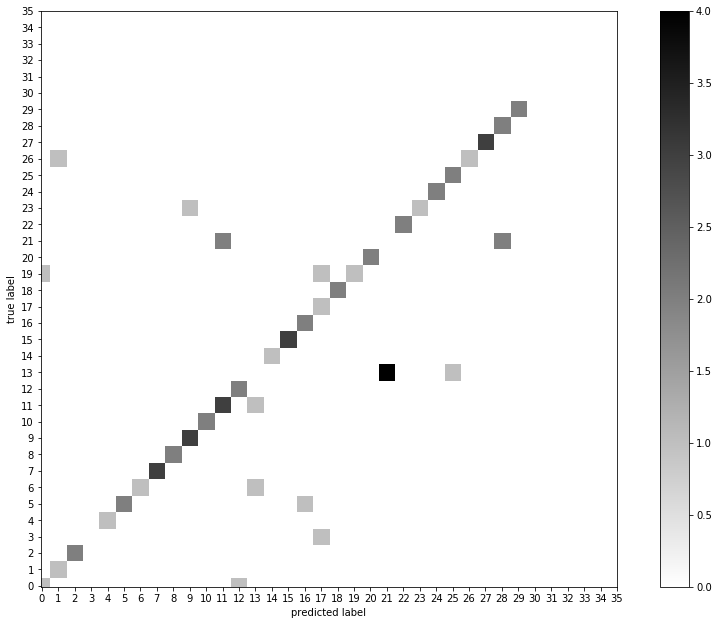

In [26]:
M = conf_matrix
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Исходя из представленных результатов. можно сделать вывод, что данный классификатор "неплохо" справляется с данной задачей: 
* совсем немного отклонений от реального значения класса наблюдается на тестовой выборке
* значение ошибки на ней равно 0.26

## Подбор параметров для модели

Для более точного обучения подберем оптимальное количество "соседей"

In [27]:
from sklearn.model_selection import GridSearchCV
nnb = [1,2, 3, 4, 5, 7, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)
pass

**Наилучшее значение параметра 'n_neighbors' и ошибка на тренировочной выборки равны:**

In [28]:
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_n_neighbors, best_cv_err)

1 0.2867647058823529


Построим классификатор для найденного значения параметра и посчитаем ошибки на тренировочной и тестовой выборке:

In [29]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.25


Для нагладного представления визуализируем значение ошибки для тестовой и тренировочной выборки для разного количества "соседей"

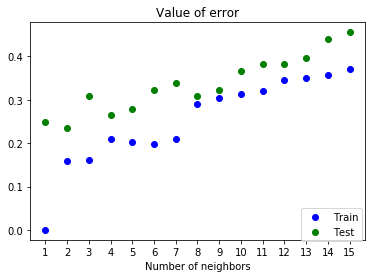

In [30]:
err_train_list = []
err_test_list = []
n = 16
for i in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)

    err_train_list.append(np.mean(y_train != y_train_predict))
    err_test_list.append(np.mean(y_test  != y_test_predict))

number = [i for i in range(1, n)]
plt.plot(number, err_train_list, 'go', label="Train", color="blue")
plt.plot(number, err_test_list, 'go', label="Test")
plt.xticks(number)
plt.xlabel("Number of neighbors")
plt.title('Value of error')
plt.legend(loc='center', bbox_to_anchor=(0.9, 0.07));

Таким образом, мы получили, что наилучшее значение параметра "количество соседей" является 1, с которым данный классификатор на тренировочной выборке вообще не совершает ошибки, а на тестовой выборке значение ошибки равно 0.25. 

# Метод опорных векторов

Построим классификатор методом опорных векторов

In [31]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.22426470588235295 0.2647058823529412


Построим матрицу ошибок для созданного классификатора:

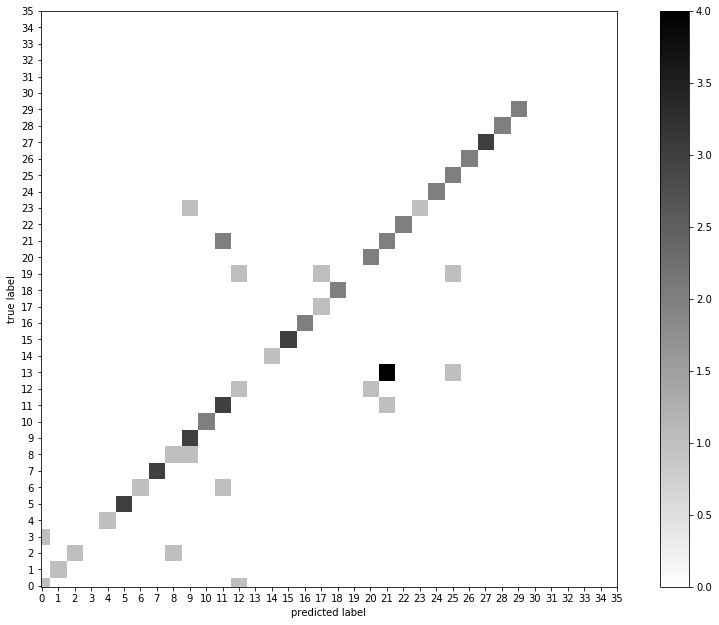

In [32]:
y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_predict)

M = conf_matrix
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Заметим, что данный классификатор с дефолтными значениями параметров работает чуть хуже чем kNN классификатор (ошибка на тренировочной и тестовой выборках равно 0.22 и 0.26 соответственно). Попробуем улучшить этот результат путем подбора оптимальных параметров. 

## Подбор параметров для модели

Для более точного обучения подберем оптимальное значение параметров

In [34]:
from sklearn.grid_search import GridSearchCV
pass

c_array = 10.**np.arange(-7, 7)
c_array

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [35]:
gamma_array = 10.**np.arange(-7, 7)
gamma_array

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [36]:
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': c_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
pass

**Наилучшее значение параметров и ошибка на тренировочной выборки равны:**

In [38]:
best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print(best_cv_err, best_C, best_gamma)

0.24264705882352944 100000.0 1e-05


Построим классификатор для найденных значений параметров и посчитаем ошибки на тренировочной и тестовой выборке:

In [39]:
svc = SVC(C = best_C, gamma = best_gamma).fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.09558823529411764 0.23529411764705882


Отметим, что подбор параметров значительно улучшили качество модели. При этом данный классификатор на тестовых данных работает немного лучше чем kNN, хотя с тренировочной выборкой наоборот.

# Случайный лес

Построим классификатор Random Forest для нашей задачи классификации

In [42]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.19117647058823528


Построим матрицу ошибок для созданного классификатора:

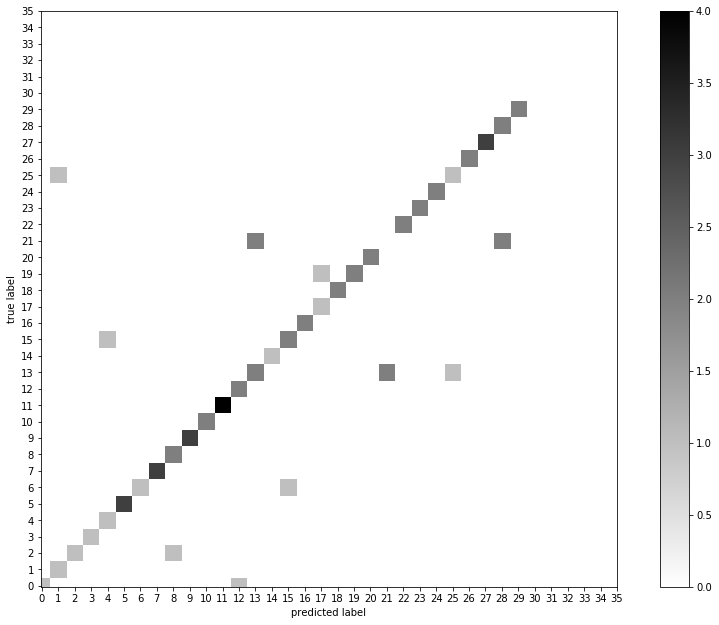

In [43]:
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_predict)

M = conf_matrix
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Заметим, что данный классификатор с значением параметра n_estimators = 1000 работает уж значительно лучше чем предыдущие классификаторы (ошибка на тренировочной и тестовой выборках равно 0 и 0.19 соответственно). 

## Проверка значимости признаков

Проверим показатели значимости признаков для построенной модели

In [44]:
np.sum(rf.feature_importances_)

0.9999999999999998

In [45]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [46]:
importances

array([0.08918648, 0.09885499, 0.09565577, 0.12075111, 0.06184607,
       0.09000032, 0.07400686, 0.07637921, 0.07244337, 0.07354046,
       0.06695511, 0.08038025])

In [47]:
indices

array([ 3,  1,  2,  5,  0, 11,  7,  6,  9,  8, 10,  4])

In [48]:
print("Feature ranking:")
for i in range(0, n_features):
    print("Future \"" + data.columns[indices[i]] + "\" has importance: " + str(importances[indices[i]]))

Feature ranking:
Future "Elongation" has importance: 0.12075110751358928
Future "Eccentricity" has importance: 0.09885498839453483
Future "Aspect Ratio" has importance: 0.095655771430539
Future "Stochastic Convexity" has importance: 0.0900003232308525
Future "Class" has importance: 0.0891864763399498
Future "Uniformity" has importance: 0.08038025404948274
Future "Maximal Indentation Depth" has importance: 0.0763792103759252
Future "Isoperimetric Factor" has importance: 0.07400686148537777
Future "Average Contrast" has importance: 0.07354046384712035
Future "Lobedness" has importance: 0.07244336696771105
Future "Third moment" has importance: 0.06695510952222743
Future "Solidity" has importance: 0.061846066842689944


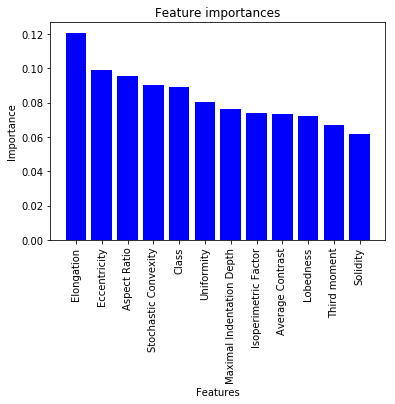

In [49]:
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color = 'b')
plt.xticks(range(n_features), data.columns[indices], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
pass

Как можно сделать вывод из представленных выше данных, все признаки являются достаточно значимыми для данной модели. При этом немного выделяется признак **Elongation (удлинение)**, так как имеет самый высокий показатель

Но при этом можно вспомнить, что ранее, при предобработке данных, мы **уже удалили несколько признаков из таблицы**. Попробуем рассмотреть данный класификатор для полных данных (без удаления), и проверить их значимость

In [50]:
y_all = all_data['Class']
X_all = all_data.drop(('Class'), axis = 1)
print(X_all.shape)
print(y_all.shape)

(340, 15)
(340,)


In [51]:
X_all = (X_all - X_all.mean(axis = 0))/X_all.std(axis = 0)
X_all.describe()

,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02
mean,6.334802e-17,-7.836868e-17,1.025324e-16,1.182714e-15,2.612289e-15,3.811330e-15,5.956020e-16,9.404242e-17,3.160870e-16,-8.450756e-16,-8.228712e-17,2.821273e-16,2.089832e-16,2.559227e-16,-1.320839e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.525466e+00,-2.893625e+00,-5.515916e-01,-2.076615e+00,-3.652049e+00,-4.757231e+00,-2.081802e+00,-8.945736e-01,-5.024633e-01,-1.288046e+00,-1.757048e+00,-1.203535e+00,-1.076344e+00,-8.814640e-01,-1.698253e+00
25%,-9.478956e-01,-8.123989e-01,-4.728318e-01,-8.392240e-01,-1.176756e-01,1.950257e-01,-8.477669e-01,-7.212939e-01,-4.880009e-01,-7.925253e-01,-7.939332e-01,-7.828785e-01,-7.268709e-01,-6.604173e-01,-7.587023e-01
50%,-8.153941e-02,2.092823e-01,-3.345309e-01,-6.087142e-02,3.835711e-01,4.275402e-01,2.203195e-01,-3.495692e-01,-4.042074e-01,-2.574413e-01,-9.949592e-02,-2.631746e-01,-2.797381e-01,-3.442725e-01,-1.456430e-01
75%,7.848168e-01,8.412579e-01,-3.736376e-02,6.115670e-01,6.345107e-01,4.885590e-01,7.791005e-01,2.719098e-01,-1.033170e-01,6.033490e-01,7.570472e-01,6.148668e-01,4.494055e-01,2.988933e-01,6.701592e-01
max,2.806315e+00,1.338651e+00,6.386117e+00,2.221971e+00,7.826495e-01,4.885590e-01,1.502892e+00,4.190168e+00,6.427570e+00,3.873877e+00,3.013427e+00,4.028996e+00,4.506561e+00,5.907140e+00,2.643174e+00


In [52]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_all, y_all)
pass

In [53]:
np.sum(rf.feature_importances_)

1.0000000000000002

In [54]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [55]:
importances

array([0.01463297, 0.08272604, 0.08870947, 0.0872017 , 0.11383228,
       0.05292161, 0.08343494, 0.06964154, 0.06695186, 0.05538931,
       0.05188316, 0.05207626, 0.05348975, 0.0593249 , 0.06778422])

In [56]:
indices

array([ 4,  2,  3,  6,  1,  7, 14,  8, 13,  9, 12,  5, 11, 10,  0])

In [57]:
print("Feature ranking:")
for i in range(0, 15):
    print("Future \"" + all_data.columns[indices[i] + 1] + "\" has importance: " + str(importances[indices[i]]))

Feature ranking:
Future "Solidity" has importance: 0.11383227605540445
Future "Aspect Ratio" has importance: 0.08870947056771848
Future "Elongation" has importance: 0.08720169534563055
Future "Isoperimetric Factor" has importance: 0.08343493875968765
Future "Eccentricity" has importance: 0.08272604299998887
Future "Maximal Indentation Depth" has importance: 0.0696415393269665
Future "Entropy" has importance: 0.06778421583221275
Future "Lobedness" has importance: 0.06695185892808299
Future "Uniformity" has importance: 0.059324902231540584
Future "Average Intensity" has importance: 0.05538930987192559
Future "Third moment" has importance: 0.05348974597520922
Future "Stochastic Convexity" has importance: 0.0529216149736475
Future "Smoothness" has importance: 0.052076263352600766
Future "Average Contrast" has importance: 0.05188315861312801
Future "Specimen Number" has importance: 0.014632967166256271


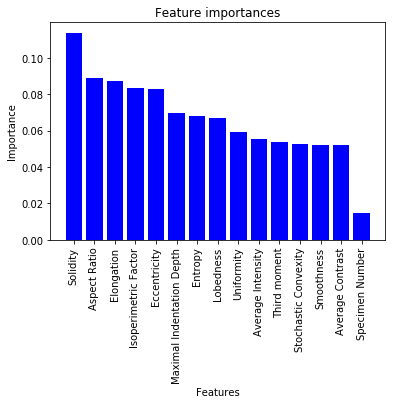

In [58]:
plt.title("Feature importances")
plt.bar(range(15), importances[indices], color = 'b')
plt.xticks(range(15), all_data.columns[indices+1], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
pass

Таким образом, наглядно видим, что параметр **"Specimen Number"** действительно практически не несет значимости.

# Extremely Randomized Trees

Построим классификатор Extremely Randomized Trees для нашей задачи классификации

In [66]:
from sklearn import ensemble

ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.19117647058823528


Построим матрицу ошибок для созданного классификатора:

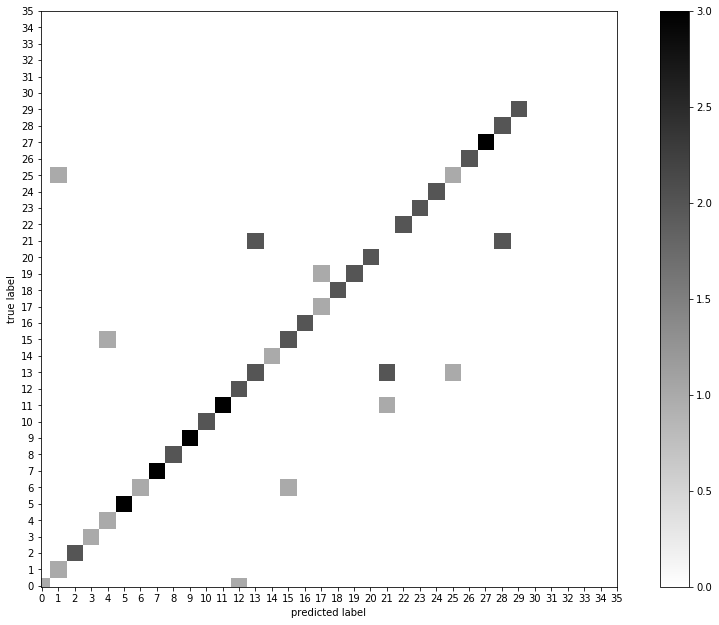

In [67]:
y_train_predict = ert.predict(X_train)
y_test_predict = ert.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_predict)

M = conf_matrix
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Заметим, что данный классификатор с значением параметра n_estimators = 1000 работает еще лучше чем предыдущие классификаторы (ошибка на тренировочной и тестовой выборках равно 0 и 0.19 соответственно). 

## Проверка значимости признаков

Проверим показатели значимости признаков для построенной модели

In [68]:
np.sum(ert.feature_importances_)

1.0000000000000002

In [69]:
importances = ert.feature_importances_
indices = np.argsort(importances)[::-1]

In [70]:
importances

array([0.08865309, 0.09565304, 0.0985548 , 0.11339191, 0.0722614 ,
       0.0899975 , 0.07675996, 0.07601634, 0.07100453, 0.07885394,
       0.06177693, 0.07707656])

In [71]:
indices

array([ 3,  2,  1,  5,  0,  9, 11,  6,  7,  4,  8, 10])

In [72]:
print("Feature ranking:")
for i in range(0, n_features):
    print("Future \"" + data.columns[indices[i]] + "\" has importance: " + str(importances[indices[i]]))

Feature ranking:
Future "Elongation" has importance: 0.11339190709293344
Future "Aspect Ratio" has importance: 0.09855479907858379
Future "Eccentricity" has importance: 0.09565304357874466
Future "Stochastic Convexity" has importance: 0.08999750304719827
Future "Class" has importance: 0.0886530922152793
Future "Average Contrast" has importance: 0.07885393636782748
Future "Uniformity" has importance: 0.07707656473845349
Future "Isoperimetric Factor" has importance: 0.0767599594740501
Future "Maximal Indentation Depth" has importance: 0.07601633858796171
Future "Solidity" has importance: 0.07226139662167863
Future "Lobedness" has importance: 0.07100452582926749
Future "Third moment" has importance: 0.06177693336802178


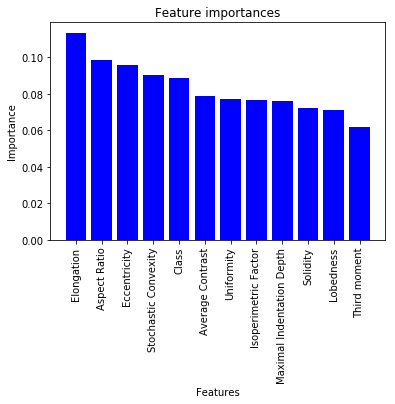

In [73]:
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices], color = 'b')
plt.xticks(range(n_features), data.columns[indices], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
pass

Как можно сделать вывод из представленных выше данных, все признаки являются **значимыми** для данной модели. При этом немного выделяется признак **Elongation (удлинение)**, так как имеет самый высокий показатель

# AdaBoost

Построим классификатор AdaBoost для нашей задачи классификации

In [74]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000, learning_rate = 3., random_state = 6)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.16176470588235295 0.35294117647058826


Построим матрицу ошибок для созданного классификатора:

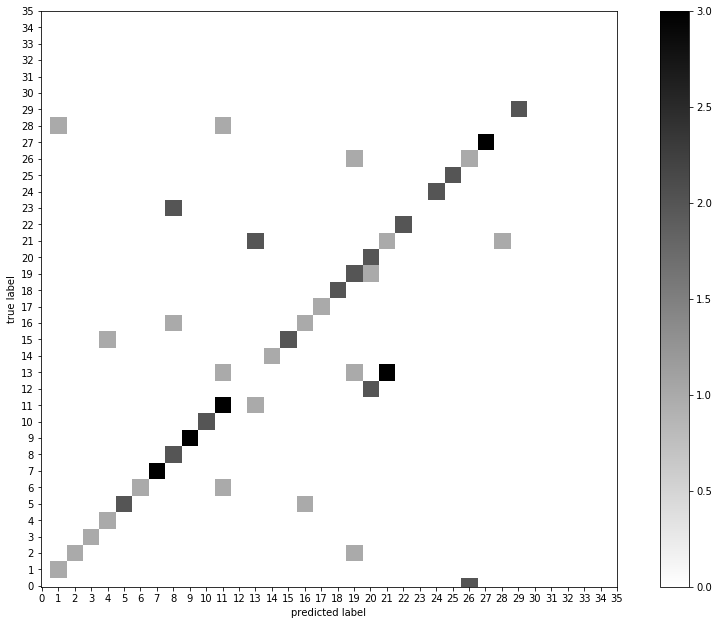

In [75]:
y_train_predict = ada.predict(X_train)
y_test_predict = ada.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_predict)

M = conf_matrix
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Заметим, что данный тип классификатора показывает результаты хуже чем найденные ранее. Возможно это из-за того, что данные не очень большие для такого количества классов.

# Gradient Boosting Trees

Построим классификатор Gradient Boosting Trees для нашей задачи классификации

In [77]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000, random_state=1)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.4117647058823529


Построим матрицу ошибок для созданного классификатора:

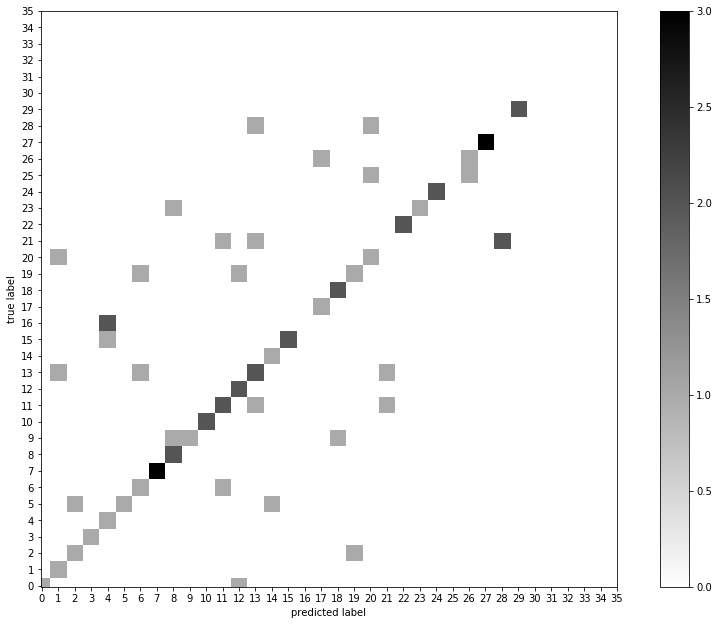

In [78]:
y_train_predict = gbt.predict(X_train)
y_test_predict = gbt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_predict)

M = conf_matrix
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Данный классификатор хоть и показывает нулевую ошибку для тренировочной выборки, не подходит для данной задачи, так как ошибка для тестовой выборки слишком велика. Возможно это из-за того, что данные не очень большие для такоо количества классов.

## Другие метрики качества

Можно заметить, что из всех описанных ранее классификатор, наиболее высокие результаты показывал классификатор Random Forest. Воспроизведем его еще раз и посмотрим для него различные метрици качества

In [79]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.22058823529411764


In [80]:
y_test_pred = rf.predict(X_test)

### Матрица рассогласования:

In [81]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0

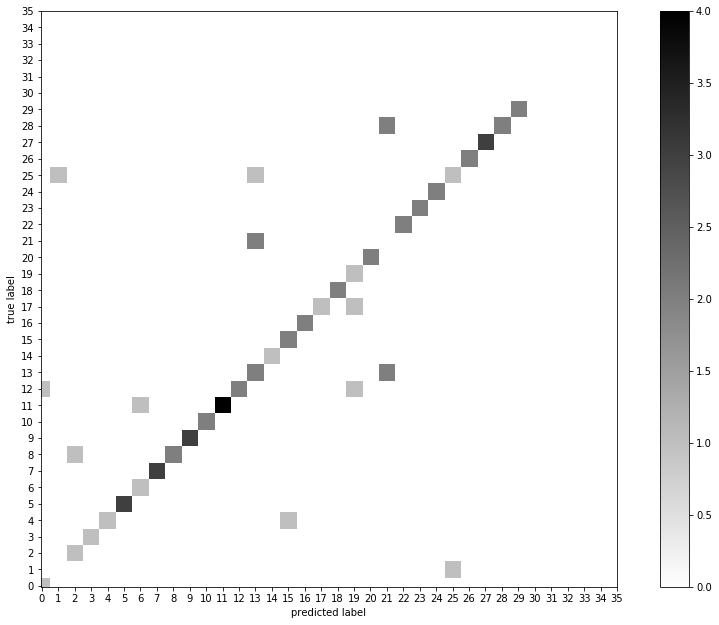

In [82]:
M = confusion_matrix(y_test_pred, y_test)
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

### precision, recall , f1-score

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ 

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          1       1.00      0.50      0.67         2
          2       0.00      0.00      0.00         1
          3       1.00      0.50      0.67         2
          4       1.00      1.00      1.00         1
          5       0.50      1.00      0.67         1
          6       1.00      1.00      1.00         3
          7       1.00      0.50      0.67         2
          8       1.00      1.00      1.00         3
          9       0.67      1.00      0.80         2
         10       1.00      1.00      1.00         3
         11       1.00      1.00      1.00         2
         12       0.80      1.00      0.89         4
         13       0.50      1.00      0.67         2
         14       0.50      0.40      0.44         5
         15       1.00      1.00      1.00         1
         22       1.00      0.67      0.80         3
         23       1.00      1.00      1.00         2
         24       0.50      1.00      0.67   

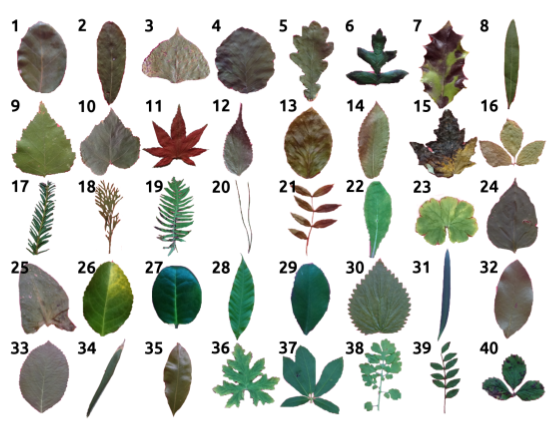

In [84]:
from IPython.display import Image
Image("Leaf.png")

Из данной таблицы видно, что хуже всего классификатор работаес с растением **№28**, чуть лучше с растениями **№2, №5, №14, №24, №32, №35** и показывает неплохие результаты на остальных растениях. 
Так же отметим, что классификатор идеально (на представленных данных) определяет растения **№4, №6, №8, №10, №11, №15, №23, №25, №29, №30, №31, №34, №36**. Это может быть объяснено тем, что эти представители имеют наиболее характерные (сильно отличающиеся от других) формы.

_Updating 23.11.2018_

# Нейронная сеть

**Обучаем классификатор:**


In [85]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
pass

Классифицируем некоторый объект, например, под индексом "39" из тестовой выборки:

In [86]:
No = 39
leaf = X_test[No:No+1]
cls = y_test[No:No+1]
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
151,0.929839,0.00646,0.497587,0.577309,0.27508,0.152927,-0.768419,-0.493485,1.221088,1.09183,0.170932,1.175456


In [87]:
cls

151    14
Name: Class, dtype: int64

In [88]:
mlp_model.predict(leaf)

array([14])

На данном объекте классификатор сработал правильно!
Теперь рассмотрим объект, например, под индексом "0" из тестовой выборки:

In [89]:
No = 0
leaf = X_test[No:No+1]
cls = y_test[No:No+1]
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
0,0.034016,-0.371679,-0.970434,0.708242,0.488559,1.400654,-0.84739,-0.500076,0.065854,-0.131357,-0.260646,0.022177


In [90]:
cls

0    1
Name: Class, dtype: int64

In [91]:
mlp_model.predict(leaf)

array([13])

К сожалению, на данном объекте классификатор сработал неправильно!

**Проверяем качество классификатора:**

In [92]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Посчитаем ошибки на обучающей и тестовой выборках:

In [93]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.25


# Подбор гиперпараметров

## Количество нейронов на скрытом слое

**Способ 1 - вручную написанным циклом**

In [94]:
hidden_layer_sizes_arr = [(x,) for x in range(10, 300, 10)]
test_err = []
train_err = []
for n in hidden_layer_sizes_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n, 
                              solver = 'lbfgs', activation = 'logistic', random_state = 2)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Визуализируем на графике значения ошибок на тренировочной и тестовой выборке при обучении модели с разным количеством нейронов:

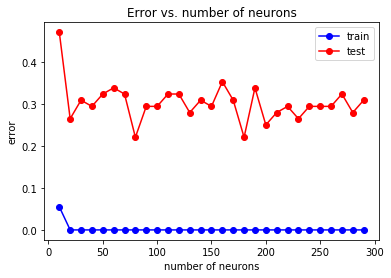

In [95]:
n_arr = np.arange(10, 300, 10)
plt.plot(n_arr, train_err, 'b-o', label = 'train')
plt.plot(n_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('error')
plt.legend()
pass

Получаем, что в данном диапозоне значений количества нейронов минимальные ошибки на тренировочной и тестовой выборке равны:

In [96]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.22058823529411764


а оптимальное количество нейронов равно:

In [97]:
n_opt = n_arr[test_err == min_test_err]
print(n_opt)

[ 80 180]


In [98]:
n_opt = n_opt[0]

#### Построим нейронную сеть при найденном _оптимальном_ значении количества нейронов:

Повторим обучение с заданным количеством нейронов и посмотри на ошибки на тренировочной и тестовой выборке:

In [99]:
mlp_model = MLPClassifier(hidden_layer_sizes = (n_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 2)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain = np.mean(y_train != y_train_pred)
errTest = np.mean(y_test != y_test_pred)
print(errTrain)
print(errTest)

0.0
0.22058823529411764


**Способ 2 - при помощи GridSearchCV**

In [100]:
from sklearn.model_selection import GridSearchCV

Указываем функцию подсчета ошибки

In [101]:
def scorer(network, X, y):
    result = network.predict(X)
    return 1 - np.mean(y != result)

Ищем оптимальный параметр:

In [102]:
hidden_layer_sizes_arr = [(x,) for x in range(10, 300, 10)]
mlp_modelCV = MLPClassifier(solver = 'lbfgs', activation = 'logistic', random_state = 2)
cv = GridSearchCV(mlp_modelCV, {'hidden_layer_sizes': hidden_layer_sizes_arr}, scoring = scorer, cv = 6)
cv.fit(X, y)
pass

Получаем, что наилучшее количество нейронов равно

In [103]:
n_opt_new = cv.best_params_['hidden_layer_sizes']
print(n_opt_new)

(130,)


#### Построим нейронную сеть при найденном _оптимальном_ значении количества нейронов:

Повторим обучение с заданным количеством нейронов и посмотри на ошибки на тренировочной и тестовой выборке:

In [104]:
mlp_model = MLPClassifier(hidden_layer_sizes = n_opt_new,
                          solver = 'lbfgs', activation = 'logistic', random_state = 2)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.0
0.27941176470588236


In [105]:
print(n_opt, errTrain, errTest)
print(n_opt_new[0], errTrain_new, errTest_new)

80 0.0 0.22058823529411764
130 0.0 0.27941176470588236


Обратим внимание, что хоть эти способы и показали разные наилучшие значения параметров. Как видно, цикл с построением всех моделей нашел значение параметра лучше. Это связано с тем, что функция GridSearchCV использует кросс-валидацию, а так как классов в исходных данных много, а объектов для каждого класса представлено немного, то она находит не самое оптимальное значения параметра.

Для дальнейшего анализа сохраним лучшее из этих значений.

In [106]:
if errTest > errTest_new:
    n_opt = n_opt_new
n_opt

80

## Параметр регуляризации alpha

**Способ 1 - вручную написанным циклом**

In [107]:
alpha_arr = np.linspace(0.0001, 0.2, 60)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n_opt, alpha = alpha,
                              solver = 'lbfgs', activation = 'logistic', random_state = 6)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Визуализируем на графике значения ошибок на тренировочной и тестовой выборке при обучении модели с разными значениями alpha:

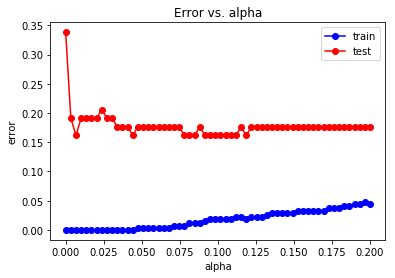

In [108]:
plt.plot(alpha_arr, train_err, 'b-o', label = 'train')
plt.plot(alpha_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Получаем, что в данном диапозоне значений параметра alpha минимальные ошибки на тренировочной и тестовой выборке равны:

In [109]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.16176470588235295


а оптимальное значение alpha равно:

In [110]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00687627 0.04414576 0.07802712 0.08141525 0.08480339 0.09157966
 0.0949678  0.09835593 0.10174407 0.1051322  0.10852034 0.11190847
 0.11868475]


In [111]:
alpha_opt = alpha_opt[0]

#### Построим нейронную сеть при найденном _оптимальном_ значении параметра alpha:

Повторим обучение с заданным параметра alpha и посмотрим на ошибки на тренировочной и тестовой выборке:

In [112]:
mlp_model = MLPClassifier(hidden_layer_sizes = (n_opt,), alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 6)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain = np.mean(y_train != y_train_pred)
errTest = np.mean(y_test != y_test_pred)
print(errTrain)
print(errTest)

0.0
0.16176470588235295


**Способ 2 - при помощи GridSearchCV**

Ищем оптимальный параметр:

In [113]:
alpha_arr = np.linspace(0.0001, 0.1, 60)
mlp_modelCV = MLPClassifier(hidden_layer_sizes = (n_opt,), solver = 'lbfgs', activation = 'logistic', random_state = 6)
cv = GridSearchCV(mlp_modelCV, {'alpha': alpha_arr}, scoring = scorer,  cv=8)
cv.fit(X, y)
pass

Получаем, что наилучшее значение параметра alpha равно

In [114]:
alpha_opt_new = cv.best_params_['alpha']
print(alpha_opt_new)

0.02549830508474576


#### Построим нейронную сеть при найденном _оптимальном_ значении параметра alpha:

Повторим обучение с заданным параметра alpha и посмотрим на ошибки на тренировочной и тестовой выборке:

In [115]:
mlp_model = MLPClassifier(hidden_layer_sizes = (n_opt,), alpha = alpha_opt_new,
                          solver = 'lbfgs', activation = 'logistic', random_state = 6)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.0
0.17647058823529413


In [116]:
print(alpha_opt, errTrain, errTest)
print(alpha_opt_new, errTrain_new, errTest_new)

0.006876271186440679 0.0 0.16176470588235295
0.02549830508474576 0.0 0.17647058823529413


Обратим внимание, что эти способы нашли **разные оптимальные значения параметра alpha**. Как видно, цикл с построением всех моделей нашел значение параметра лучше. Это связано с тем, что функция GridSearchCV использует кросс-валидацию, а так как классов в исходных данных много, а объектов для каждого класса представлено немного, то она находит не самое оптимальное значения параметра.

Для дальнейшего анализа сохраним наилучшее значение параметра alpha

In [117]:
if errTest > errTest_new:
    alpha_opt = alpha_opt_new
alpha_opt

0.006876271186440679

#### Построим итоговую нейронную сеть с подобранными оптимальными параметрами

In [118]:
mlp_model = MLPClassifier(hidden_layer_sizes = (n_opt,), alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 6)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain = np.mean(y_train != y_train_pred)
errTest = np.mean(y_test != y_test_pred)
print(errTrain)
print(errTest)

0.0
0.16176470588235295


**Теперь рассмотрим нейронную сеть с 2 скрытыми слоями**

In [119]:
mlp_model = MLPClassifier(hidden_layer_sizes = (80,47), alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 6)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain = np.mean(y_train != y_train_pred)
errTest = np.mean(y_test != y_test_pred)
print(errTrain)
print(errTest)

0.0
0.14705882352941177


Используя нейронную сеть с 2 скрытыми слоями, мы получили модель, которая предсказывает лучше, чем сеть с 1 скрытым слоем. Попробуем также подобрать для нее оптимальное количество слоев на скрытых слоях.

In [120]:
hidden_layer_sizes_arr = [(x, y) for x in range(10, 100, 5) for y in range(10, 100, 5)]
test_err = []
train_err = []
n_number = []
for n in hidden_layer_sizes_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n, alpha = alpha_opt,
                              solver = 'lbfgs', activation = 'logistic', random_state = 6)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    n_number.append(n)

Визуализируем на графике значения ошибок на тренировочной и тестовой выборке при обучении модели с разным количеством нейронов:

In [121]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.11764705882352941


Получим оптимальные значения для количества нейронов:

In [122]:
opt_n_arr = [n_number[i] for i in range(0, len(n_number)) if test_err[i] == min_test_err]
opt_n_arr

[(25, 90), (40, 60)]

In [123]:
n_opt = opt_n_arr[1]
n_opt

(40, 60)

Как видно, после подбора количества нейронов, качество модели заметно улучшилось. Попробуем ее еще улучшить, подобрав оптимальное значение параметра alpha:

In [125]:
alpha_arr = np.linspace(0.0001, 0.2, 60)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n_opt, alpha = alpha,
                              solver = 'lbfgs', activation = 'logistic', random_state = 6)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [126]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.11764705882352941


In [127]:
alpha_opt_new = alpha_arr[test_err == min_test_err]
print(alpha_opt_new)

[0.00687627]


In [128]:
alpha_opt_new = alpha_opt_new[0]

In [129]:
if alpha_opt_new == alpha_opt:
    print("YES")
else:
    print("NO")

YES


Оптимальные значения параметра alpha для нейронной сети с одним и двумя скрытыми слоями оказались равными

#### Построим итоговую нейронную сеть при найденных _оптимальных_ значениях вс ех параметров:

Повторим обучение с заданным параметрами и посмотрим на ошибки на тренировочной и тестовой выборке:

In [130]:
mlp_model_final = MLPClassifier(hidden_layer_sizes = n_opt, alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 6)
mlp_model_final.fit(X_train, y_train)

y_train_pred = mlp_model_final.predict(X_train)
y_test_pred = mlp_model_final.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.0
0.11764705882352941


## Другие метрики качества

Проанализируем качество полученной модели с использованием разных метрик качества

### Матрица рассогласования:

Рассмотрим матрицу рассогласования для тестовой выборки при нашем изначальном разделении на тренировочную и тестовую выборку

In [131]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0

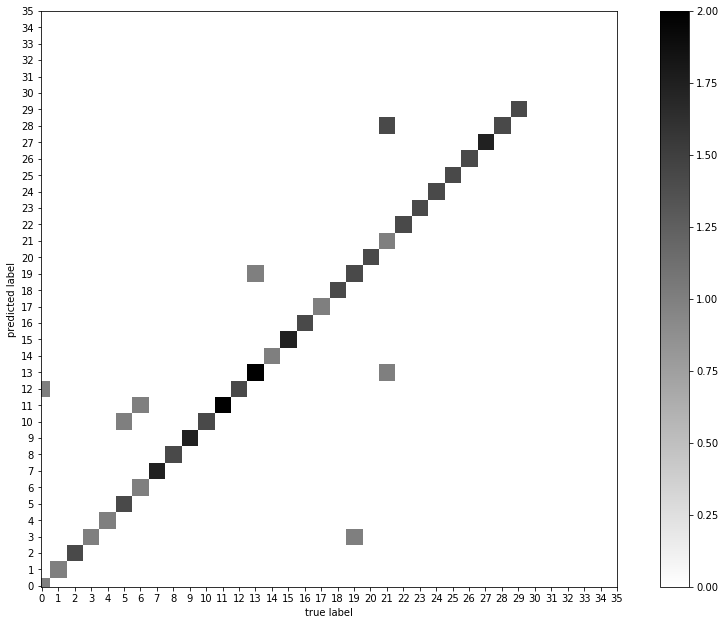

In [132]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

К сожалению, мы не можем достаточно хорошо оценить качество модели, используя данную матрицу рассогласования для тестового набора, так как в наших данных небольшое количество объектов у каждого класса. Правильнее будет использовать кросс-валидацию и рассмотреть общую матрицу рассогласования

In [133]:
from sklearn.cross_validation import KFold

conf_matrix = None
kf = KFold(len(y), n_folds=5)
for train_index, test_index in kf:
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    mlp_model_final.fit(X_train_cv, y_train_cv)
    cm = confusion_matrix(y_test, mlp_model_final.predict(X_test))
    if conf_matrix is not None:
        conf_matrix += cm
    else:
        conf_matrix = cm

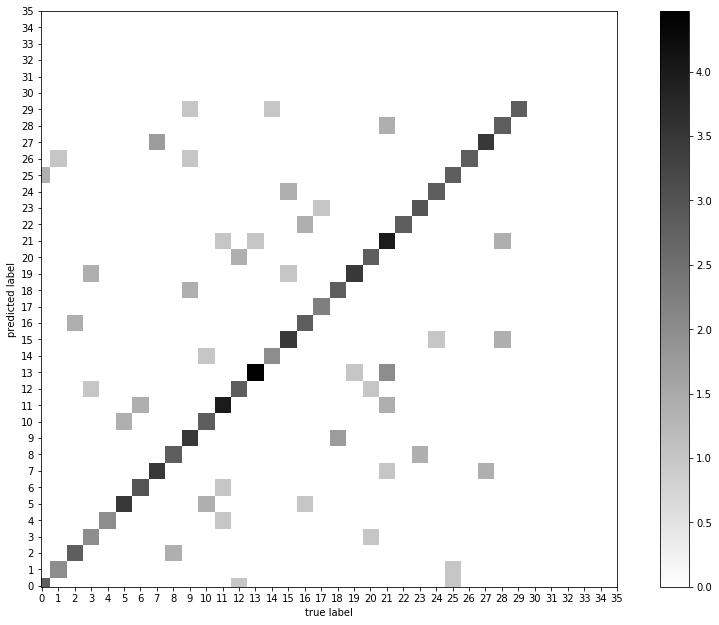

In [134]:
M = np.sqrt(conf_matrix)
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

### precision, recall , f1-score

Рассмотрим также данные метрики для начального разделения на тренировочную и тестовую выборки

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ 

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          1       1.00      0.50      0.67         2
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         2
          4       0.50      1.00      0.67         1
          5       1.00      1.00      1.00         1
          6       1.00      0.67      0.80         3
          7       1.00      0.50      0.67         2
          8       1.00      1.00      1.00         3
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         3
         11       0.67      1.00      0.80         2
         12       0.80      1.00      0.89         4
         13       0.67      1.00      0.80         2
         14       0.80      0.80      0.80         5
         15       1.00      1.00      1.00         1
         22       1.00      1.00      1.00         3
         23       1.00      1.00      1.00         2
         24       1.00      1.00      1.00   

Из данной таблицы видно, что данная модель неплохо работает уже со всеми исходными классами (в отличии от моделей, рассмотренных выше в рамках лабораторной работы №1). Но всё же классификатор хуже всего работает с растением **№28** - очень маленькая доля найденных классфикатором объектов, принадлежащих этому классу, относительно всех объектов этого класса в тестовой выборке (т.е. полнота), и, соответственно, F1-мера тоже небольшая. Чуть лучше, но также не совсем хорошо классификатор работает с растением **№1, №7** (полнота = 0.5). Относительно точности, для растений **№4, №35** модель определяет правильно лишь половину объектов из тех, которые действительно принадлежат этим классам. Для всех остальных представителей модель работает достаточно хорошо.

Так же как и с матрицей рассогласования, мы не можем судить о качестве модели по данным метрикам, полученным при одном разделении на тренировочную и тестовую выборки. Поэтому рассмотрим взвешанные метрики "точность", "полнота" и "F1-метрика" с использованием кросс-валидации.

In [139]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp_model_final, X, y, cv=4, scoring='recall_weighted') 

array([0.74193548, 0.79775281, 0.79518072, 0.81333333])

In [140]:
cross_val_score(mlp_model_final, X, y, cv=4, scoring='precision_weighted')

array([0.75842294, 0.83520599, 0.81445783, 0.84066667])

In [141]:
cross_val_score(mlp_model_final, X, y, cv=4, scoring='f1_weighted')

array([0.73182284, 0.79505083, 0.78551348, 0.8028254 ])

Из этих значений можно сделать вывод, что данная модель достаточно хорошо работает с представленными данными.

## Ошибки в работе нейронной сети

Выведем все объекты с атрибутами, для которых классификатор не смог правильно определить класс

In [142]:
err_number = 0
for i in range(N_test):
    leaf = X_test[i:i+1]
    cls = y_test[i:i+1]
    cls_pred = mlp_model_final.predict(leaf)
    if cls_pred[0] != cls.values[0]:
        print("\nObject index =", i, "| Predicted class =",  cls_pred[0], "| Real class =", cls.values[0])
        err_number +=1


Object index = 1 | Predicted class = 1 | Real class = 32

Object index = 7 | Predicted class = 22 | Real class = 31

Object index = 13 | Predicted class = 8 | Real class = 34

Object index = 14 | Predicted class = 10 | Real class = 33

Object index = 15 | Predicted class = 8 | Real class = 34

Object index = 17 | Predicted class = 28 | Real class = 35

Object index = 28 | Predicted class = 28 | Real class = 35

Object index = 45 | Predicted class = 1 | Real class = 32

Object index = 47 | Predicted class = 15 | Real class = 36

Object index = 48 | Predicted class = 8 | Real class = 34

Object index = 53 | Predicted class = 10 | Real class = 36

Object index = 58 | Predicted class = 2 | Real class = 33

Object index = 63 | Predicted class = 22 | Real class = 31


Всего в исходных данных столько объектов, на которых нейронная сеть с подобранными оптимальными параметрами не смогла правильно определить растение:

In [143]:
err_number

13